# importing libraries

In [35]:
import numpy as np
import pandas as pd

# Loading dataset

In [36]:
df=pd.read_csv('D:/Research Work/road/attacks/fuzzing_attack_1.log')
df.head()

,(1000000000.000000) can0 20E#4E2003A0C63F8FFF
0,(1000000000.000002) can0 522#DF7FD0007F08001C
1,(1000000000.000003) can0 366#80DDC8020147CE38
2,(1000000000.001000) can0 580#00000003F0880000
3,(1000000000.001001) can0 0D0#427504646C018700
4,(1000000000.001002) can0 033#0007A0000E0007D0


# Spliting the data in different columns

Here as we can see that  our data need to be preprossed because  all the data is present in a column and we need split data into different columns so ,for that here I'm splitting the data in differenr columns

In [37]:
log_data  = open('D:/Research Work/road/attacks/fuzzing_attack_1.log', 'r')
split_list = []
for line in log_data:
    thing1 = line.split(' ')
    time = thing1[0][1:18]
    idd = thing1[1][:4]
    message = thing1[2][:-2]
    

    split_list.append([time, idd, message])

df1 = pd.DataFrame(split_list, columns=['Unix Timestamp', 'Channel', 'IDHexandDataFeild'])
df1

,Unix Timestamp,Channel,IDHexandDataFeild
0,1000000000.000000,can0,20E#4E2003A0C63F8FF
1,1000000000.000002,can0,522#DF7FD0007F08001
2,1000000000.000003,can0,366#80DDC8020147CE3
3,1000000000.001000,can0,580#00000003F088000
4,1000000000.001001,can0,0D0#427504646C01870
...,...,...,...
49337,1000000020.338944,can0,434#022820AE83448D7
49338,1000000020.338946,can0,6E0#000000000000000
49339,1000000020.338947,can0,280#18E002700000000
49340,1000000020.338948,can0,498#87FFBFFCFB80000


# Seprating id and dataframe

As we can see that  ID And Data is combined together so need to be seprated,so for sepration id and data I selected IDHexandDataFeild column from the data set and split it into IDHex and DataFrame in Out variable.

In [38]:
out = pd.DataFrame(df1.IDHexandDataFeild.str.split('#',1).tolist(),columns=['IDhex','DataFrame'])
out.head()

,IDhex,DataFrame
0,20E,4E2003A0C63F8FF
1,522,DF7FD0007F08001
2,366,80DDC8020147CE3
3,580,00000003F088000
4,0D0,427504646C01870


# choosing these two columns from the original dataset

As above i have seprated IDHexandDataFeild column and seprated it in id and DataFrame column so, from the original dataset i have to pick others columns too, to combine these two datasets.for that I'm here selecting Unix Timestamp and Channel column from the original data set  

In [39]:
df2=df1[['Unix Timestamp', 'Channel']] 
df2.head()

,Unix Timestamp,Channel
0,1000000000.000000,can0
1,1000000000.000002,can0
2,1000000000.000003,can0
3,1000000000.001000,can0
4,1000000000.001001,can0


# Converting the data of IDhex column which is in hexadecimal to decimal 

As IDhex and DataFrame is present in hexadecimal so it need to be converted in decimal so here I'm converting IDHex  into decimal .

In [40]:
out['IDhex'] = out['IDhex'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,526,4E2003A0C63F8FF
1,1314,DF7FD0007F08001
2,870,80DDC8020147CE3
3,1408,00000003F088000
4,208,427504646C01870
...,...,...
49337,1076,022820AE83448D7
49338,1760,000000000000000
49339,640,18E002700000000
49340,1176,87FFBFFCFB80000


# here converting the DataFrame column's hex data in decimal

now converting datframe into decimal

In [41]:
out['DataFrame'] = out['DataFrame'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,526,351843970204301567
1,1314,1006551218315624449
2,870,580362369852800227
3,1408,1057521664
4,208,299296163008354416
...,...,...
49337,1076,9713132565186775
49338,1760,0
49339,640,112027208234565632
49340,1176,612485150465851392


In [42]:
#checking the out data which i have converted in decimal which was in hexadecimal
out.head()

,IDhex,DataFrame
0,526,351843970204301567
1,1314,1006551218315624449
2,870,580362369852800227
3,1408,1057521664
4,208,299296163008354416


# Combining the datasets

now here i'm collecting the two data sets which i have above splitted from the original data.
"df2"here i have collected the data which i don't need to convert in decimaml 
in "Out" data i have collected the data which i have to convert into decimal.

In [43]:
frames=[df2,out]

In [44]:
# here i concate the two datas, because it need to be togather
result=pd.concat(frames ,axis=1)
result.head()

,Unix Timestamp,Channel,IDhex,DataFrame
0,1000000000.000000,can0,526,351843970204301567
1,1000000000.000002,can0,1314,1006551218315624449
2,1000000000.000003,can0,870,580362369852800227
3,1000000000.001000,can0,1408,1057521664
4,1000000000.001001,can0,208,299296163008354416


 i'm saving this data in a file.

In [45]:
#here i have save my data which i have splitted and  converted in decimal 
save=result.to_csv("D:/Research Work/road/extractedfrompython/fuzzing_attack.csv")

In [46]:
result

,Unix Timestamp,Channel,IDhex,DataFrame
0,1000000000.000000,can0,526,351843970204301567
1,1000000000.000002,can0,1314,1006551218315624449
2,1000000000.000003,can0,870,580362369852800227
3,1000000000.001000,can0,1408,1057521664
4,1000000000.001001,can0,208,299296163008354416
...,...,...,...,...
49337,1000000020.338944,can0,1076,9713132565186775
49338,1000000020.338946,can0,1760,0
49339,1000000020.338947,can0,640,112027208234565632
49340,1000000020.338948,can0,1176,612485150465851392


checing is there any null values in our dataset

In [47]:
#checking is there any null values in dataframe column
result['DataFrame'].isnull().sum()
#Unix Timestamp	Channel	IDhex	DataFrame

0

As we you see that there is no null values here let's check the shape of the dataset

In [48]:
result.shape

(49342, 4)

As you can see that we have here  4 columns and 49342 records let's check the size of the dataset

In [49]:

result.size

197368

Checking the unique values in each columns

In [50]:
print("There are" ,result['Unix Timestamp'].nunique()," unique values values of TimeStamp") 
print("There are" , result['IDhex'].nunique() ," unique values values of IDs")
print("There are" , result['DataFrame'].nunique() ," unique values values of DataFrame")
print("There are" , result['Channel'].nunique() ," unique values values of Channel")

There are 48801  unique values values of TimeStamp
There are 662  unique values values of IDs
There are 7762  unique values values of DataFrame
There are 1  unique values values of Channel


Here you can see that in Channel column ,only have 1 unique value so it can be drop from here

In [51]:
result = result.loc[:, ~result.columns.str.contains('^Channel')]

result

,Unix Timestamp,IDhex,DataFrame
0,1000000000.000000,526,351843970204301567
1,1000000000.000002,1314,1006551218315624449
2,1000000000.000003,870,580362369852800227
3,1000000000.001000,1408,1057521664
4,1000000000.001001,208,299296163008354416
...,...,...,...
49337,1000000020.338944,1076,9713132565186775
49338,1000000020.338946,1760,0
49339,1000000020.338947,640,112027208234565632
49340,1000000020.338948,1176,612485150465851392


 done with preprocessing Now moving towards implmentation of algorithms.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

As you can see above the size of dataset is too huge, so need to be divided in chunks ,here i Have splitted the dataset in equally chunk so that ,we can implment further

In [53]:
# total rows are 49342  49 thousand 3 hundred and 42
n =17500  #chunk row size
list_df = [result[i:i+n]
for i in range(0,result.shape[0],n)]

In [54]:
list_df[0]
list_df[1]
list_df[2]

,Unix Timestamp,IDhex,DataFrame
35000,1000000014.364543,167,74607980113321482
35001,1000000014.366693,1760,0
35002,1000000014.368139,1255,5640712192
35003,1000000014.369100,339,49408
35004,1000000014.369103,4095,0
...,...,...,...
49337,1000000020.338944,1076,9713132565186775
49338,1000000020.338946,1760,0
49339,1000000020.338947,640,112027208234565632
49340,1000000020.338948,1176,612485150465851392


In [55]:
# now checnking the size of first chunk.
res=list_df[0]
res.shape

(17500, 3)

here i'm seprating  dependent and independent column from the dataset 

In [56]:
X = res.iloc[:, :3].values
X

array([['1000000000.000000', 526, 351843970204301567],
       ['1000000000.000002', 1314, 1006551218315624449],
       ['1000000000.000003', 870, 580362369852800227],
       ...,
       ['1000000007.115244', 569, 1036],
       ['1000000007.116302', 4095, 0],
       ['1000000007.116305', 615, 1152921504606846975]], dtype=object)

In [57]:
y = res.iloc[:, 2].values
y

array([ 351843970204301567, 1006551218315624449,  580362369852800227, ...,
                      1036,                   0, 1152921504606846975],
      dtype=int64)

In [58]:
print(X)
print(y)

[['1000000000.000000' 526 351843970204301567]
 ['1000000000.000002' 1314 1006551218315624449]
 ['1000000000.000003' 870 580362369852800227]
 ...
 ['1000000007.115244' 569 1036]
 ['1000000007.116302' 4095 0]
 ['1000000007.116305' 615 1152921504606846975]]
[ 351843970204301567 1006551218315624449  580362369852800227 ...
                1036                   0 1152921504606846975]


Importing all the libraries which are required in implementation of all 4 algorithm's and splitted the dataset in 70,30 ratio :
<br>
70% for training
<br>
30% for testing

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# RANDOM FOREST

First i'm implementing Random Forest Classifier.

In [60]:
from sklearn import metrics
model= RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction))


MemoryError: could not allocate 48529408 bytes

# DECISION TREE

As you can see that from random forest we are getting 61% accuracy which is not good, let's try an other algorithm and check 

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))  




# KNN

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
prediction=knn1.predict(X_test)
print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



# SVM

In [ ]:
svm_m=SVC()
svm_m.fit(X_train,y_train)
prediction=svm_m.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')




Here checking for  second chunk 


# SECOND CHUNK

In [ ]:
res2=list_df[1]
res2

In [ ]:
X = res2.iloc[:, :3].values
X

In [ ]:
y = res2.iloc[:,2].values
y

In [ ]:
res2.shape

# RANDOM FOREST

In [ ]:
from sklearn import metrics
model2= RandomForestClassifier()
model2.fit(X_train,y_train)
prediction=model2.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction), '\n')



# KNN

In [33]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

prediction=knn2.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.8053333333333333


# DECISION TREE

In [34]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))




MemoryError: could not allocate 24264704 bytes

# SVM

In [ ]:
svm_m2=SVC()
svm_m2.fit(X_train,y_train)
prediction=svm_m2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')


In [38]:
res=list_df[0]
res.shape

(17500, 3)

# THIRD CHUNK

In [39]:
res3=list_df[2]
res3.shape

(14342, 3)

In [40]:
X = res3.iloc[:, :3].values
X

array([['1000000014.364543', 167, 74607980113321482],
       ['1000000014.366693', 1760, 0],
       ['1000000014.368139', 1255, 5640712192],
       ...,
       ['1000000020.338947', 640, 112027208234565632],
       ['1000000020.338948', 1176, 612485150465851392],
       ['1000000020.338949', 560, 1103381909490106688]], dtype=object)

In [41]:
y = res3.iloc[:, 2].values
y

array([  74607980113321482,                   0,          5640712192, ...,
        112027208234565632,  612485150465851392, 1103381909490106688],
      dtype=int64)

# RANDOM FOREST

In [42]:
from sklearn import metrics
model3= RandomForestClassifier()
model3.fit(X_train,y_train)
prediction=model3.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction), '\n')



Accuracy From Random Forest:  0.6125714285714285 



# KNN

In [61]:
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train, y_train)

prediction=knn3.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.8053333333333333


# DECISION TREE

In [62]:
DT3 = DecisionTreeClassifier()
DT3.fit(X_train, y_train)
prediction=DT3.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))




Accuracy DEcision Tree:  0.6131428571428571


# SVM

In [65]:
svm_m2=SVC()
svm_m2.fit(X_train,y_train)
prediction=svm_m2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')


Accuracy:  0.20895238095238095 



# Hyperperameter tunning

In [63]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

All Accuracies:  [0.79428571 0.80342857 0.82171429 0.81942857 0.80914286 0.80228571
 0.816      0.81485714 0.81942857 0.80914286 0.81142857 0.81828571
 0.81257143 0.81485714 0.808      0.81371429 0.79428571 0.80457143
 0.792      0.78971429] 

Mean of all Accuracies:  0.8084571428571428 

Standard Deviation:  0.009509780142955296


Text(0, 0.5, 'Cross-Validated Accuracy')

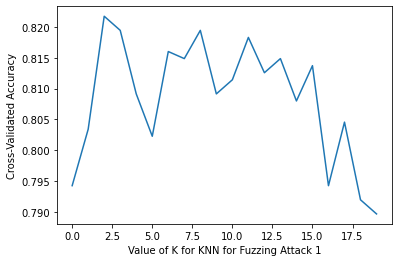

In [64]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN for Fuzzing Attack 1')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.70742857 0.72342857 0.72685714 0.73142857 0.73714286 0.73371429
 0.73485714 0.72228571 0.73257143 0.72457143 0.72228571 0.73257143
 0.72685714 0.72       0.72457143 0.72       0.70742857 0.70742857
 0.69257143 0.69142857] 

Mean of all Accuracies:  0.7209714285714286 

Standard Deviation:  0.012906065651942304


Text(0, 0.5, 'Cross-Validated Accuracy')

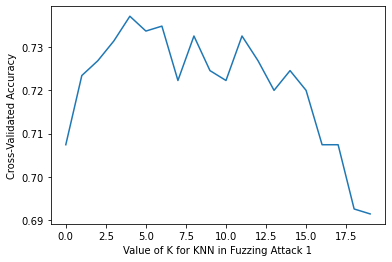

In [66]:
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN in Fuzzing Attack 1')
plt.ylabel('Cross-Validated Accuracy')


As we can see that by increasing neighour values accuaracy is decreasing.

All Accuracies:  [0.62040816 0.6155102  0.63102041 0.60244898 0.60734694 0.60816327
 0.62612245 0.60734694 0.62285714 0.63265306] 

Mean of all Accuracies:  0.6173877551020409 

Standard Deviation:  0.010235380569878487


Text(0, 0.5, 'Cross-Validated Accuracy')

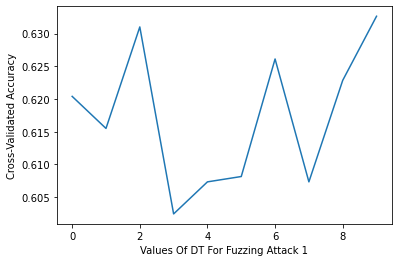

In [69]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =5,  min_samples_split =5,
                              min_samples_leaf =2, max_features =2)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=10)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of DT For Fuzzing Attack 1')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.45469388 0.43346939 0.40326531 0.39673469 0.43673469 0.46204082
 0.39918367 0.43183673 0.42938776 0.47346939] 

Mean of all Accuracies:  0.4320816326530612
Standard Deviation:  0.025129203820085582


Text(0, 0.5, 'Cross- Validated Accuracy')

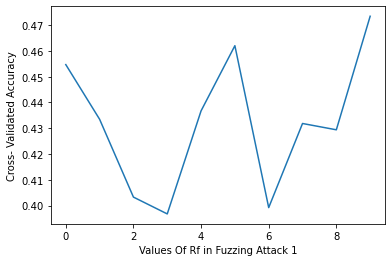

In [75]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=1, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean())
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf in Fuzzing Attack 1')
plt.ylabel('Cross- Validated Accuracy')
